### Porting to Google Colab
The following cell enables this notebook to run from Google Colab as well as from your local machine IDE.<br>
You can change `root_directory` and/or `this_notebook_google_path` to point to the directory in your Google account, which contains this notebook, together with the `imgs` sub-directory and the rest of the files.<br>

In [1]:
import sys
import os
try:
    from google.colab import drive as google_drive # type: ignore
except:
    # no Google Colab --> fall back to local machine
    google_drive = None

if google_drive is not None:
    google_drive_directory = os.path.join('/','content','gdrive')
    google_drive.mount(google_drive_directory)
    all_projects_path = os.path.join(google_drive_directory, 'Othercomputers','My Laptop', 'projects')
else:
    all_projects_path = os.path.join('d:\\', 'projects')

project_path = os.path.join(all_projects_path,'RUNI','Thesis')
assert os.path.exists(project_path), f'Project path {project_path} not found!'
# enable import python files from this notebook's path
sys.path.append(project_path)
# enable reading images and data files from this notebook's path
os.chdir(project_path)

datasets_path = os.path.join(project_path, 'datasets')
assert os.path.exists(datasets_path), f'Datasets path {datasets_path} not found!'

output_path = os.path.join(project_path, 'output')
os.makedirs(output_path, exist_ok=True)
assert os.path.exists(output_path), f'Output path {output_path} not found!'

print(f'Current working directory: {os.getcwd()}')
print(f'Datasets path: {datasets_path}')
print(f'Output path: {output_path}')

Current working directory: d:\projects\RUNI\Thesis
Datasets path: d:\projects\RUNI\Thesis\datasets
Output path: d:\projects\RUNI\Thesis\output


In [2]:
from python.hpc import HybridArray

Numba version: 0.60.0
numba.njit is available.
CUDA is available and will be used for GPU operations.
Printing CUDA active device attributes:
    Name:                               NVIDIA GeForce GTX 1650
    Free Memory:                        3367680 [KB]
    Total Memory:                       4193984 [KB]
    Compute capability:                 7.5
    Clock rate:                         1560.00 [MHz]
    Memory clock rate:                  4001.00 [MHz]
    Memory bus width:                   128 bits
    Memory band width (theoretical)     128.03 [GByte/Sec]
    Number of multiprocessors:          16
    Minimal grid size:                  128
    Maximum grid size:                  (2147483647, 65535, 65535)
    Maximum block dimensions:           (1024, 1024, 64)
    Maximum threads per block:          1024
    Warp size:                          32
    Maximum shared memory per block:    49152 [bytes]
    Maximum registers per block:        65536
    Total constant memory:   

In [3]:
import numpy as np
from python.metrics.metrics import analyze_auc_r_beta_ranges
from python.analysis import visualization

In [4]:
N = 1000
num_monte = 100
num_r = 11
num_beta = 11
r_range = np.linspace(0.0, 1.0, num_r)
beta_range = np.linspace(0.0,1.0,num_beta)
alpha = 0.1
print(f'{r_range=}')
print(f'{beta_range=}')

r_range=array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])
beta_range=array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])


In [5]:

def simulation3(r_range: np.ndarray|list, beta_range: np.ndarray|list,\
                **kwargs) -> None:
    print(f'Running on {kwargs}')
    for gpu,njit in [(False,False), (False,True), (True,False)]:
        auc =analyze_auc_r_beta_ranges(\
            r_range=r_range, beta_range=beta_range,\
            use_gpu=gpu, use_njit=njit, **kwargs)
        print(f'{gpu=} {njit=} --> auc.mean()={auc.mean():.2f}')
        visualization.heatmap_r_beta_range(\
            r_range=r_range,\
            beta_range=beta_range,\
            data=auc,\
            value_name='AUC', data_min=0.5, data_max=1.0,\
            title=f'{gpu=} {njit=}')



Running on {'N': 1000, 'num_monte': 100, 'alpha_selection_method': 0.1, 'transform_method': 'higher_criticism_stable', 'discovery_method': 'argmin'}


Processing: 100%|██████████| 122/122 [01:59<00:00,  1.02step/s, Current Step=121]


gpu=False njit=False --> auc.mean()=0.72


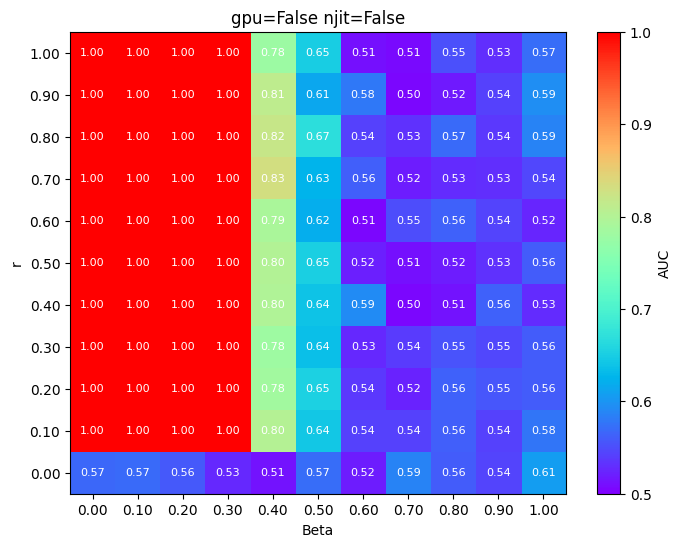

Processing: 100%|██████████| 122/122 [00:18<00:00,  6.60step/s, Current Step=121]


gpu=False njit=True --> auc.mean()=0.72


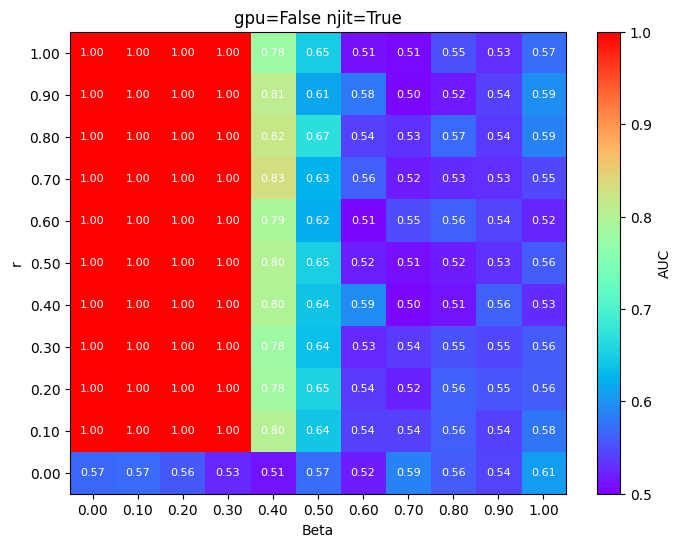

Processing:   0%|          | 0/122 [00:00<?, ?step/s, Current Step=0]d:\venv\thesis\Lib\site-packages\numba\cuda\dispatcher.py:536: NumbaPerformanceWarning: Grid size 2 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
Processing:   1%|          | 1/122 [00:00<01:26,  1.40step/s, Current Step=1]d:\venv\thesis\Lib\site-packages\numba\cuda\dispatcher.py:536: NumbaPerformanceWarning: Grid size 2 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
Processing:   4%|▍         | 5/122 [00:01<01:11,  1.64step/s, Current Step=5]d:\venv\thesis\Lib\site-packages\numba\cuda\dispatcher.py:536: NumbaPerformanceWarning: Grid size 64 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
Processing:   5%|▍         | 6/122 [00:01<01:10,  1.64step/s, Current Step=6]d:\venv\thesis\Lib\site-packages\numba\cuda\dispatcher.py:536: NumbaPerformanceWarning: Gr

gpu=True njit=False --> auc.mean()=0.72


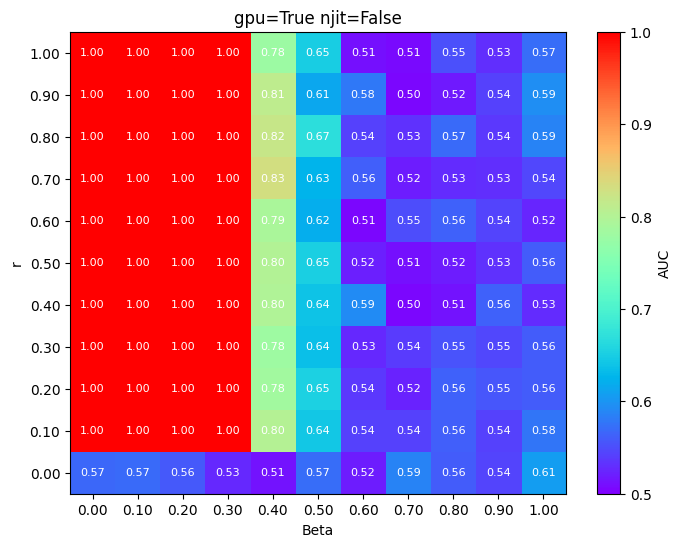

In [6]:
simulation3(N=N, num_monte=num_monte,\
            r_range=r_range, beta_range=beta_range,\
            alpha_selection_method = alpha,\
            transform_method='higher_criticism_stable',\
            discovery_method='argmin')

Running on {'N': 1000, 'num_monte': 100, 'alpha_selection_method': 0.1, 'transform_method': 'higher_criticism_unstable', 'discovery_method': 'argmin'}


Processing: 100%|██████████| 122/122 [01:59<00:00,  1.02step/s, Current Step=121]


gpu=False njit=False --> auc.mean()=0.73


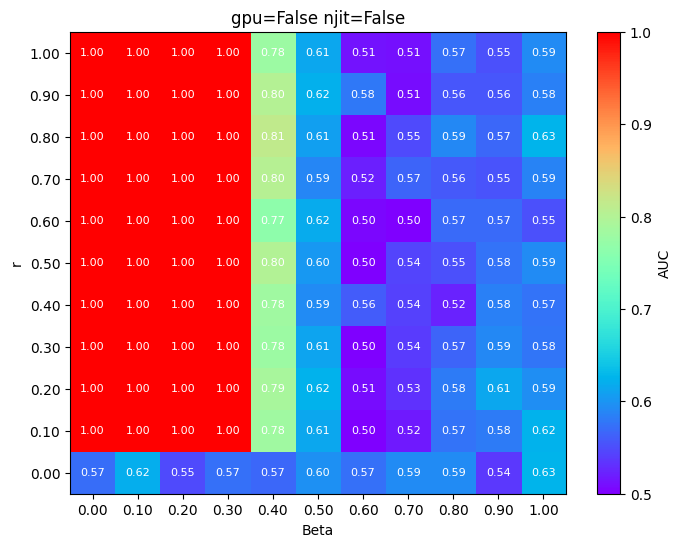

Processing: 100%|██████████| 122/122 [00:02<00:00, 43.43step/s, Current Step=121]


gpu=False njit=True --> auc.mean()=0.73


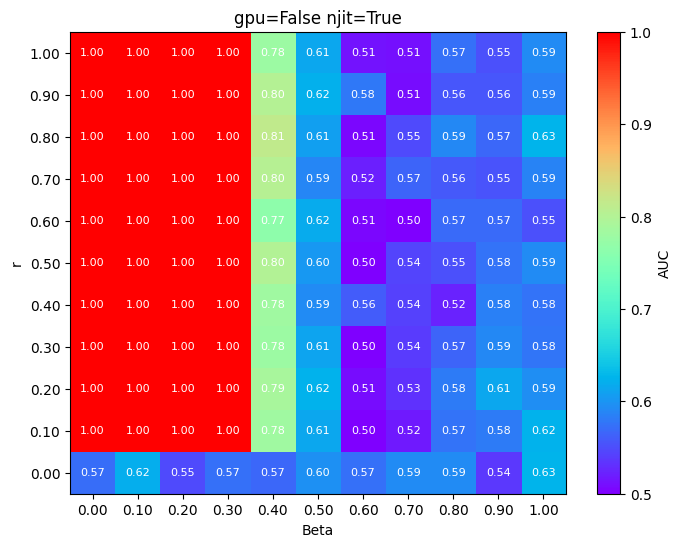

Processing: 100%|██████████| 122/122 [00:00<00:00, 172.64step/s, Current Step=121]


gpu=True njit=False --> auc.mean()=0.73


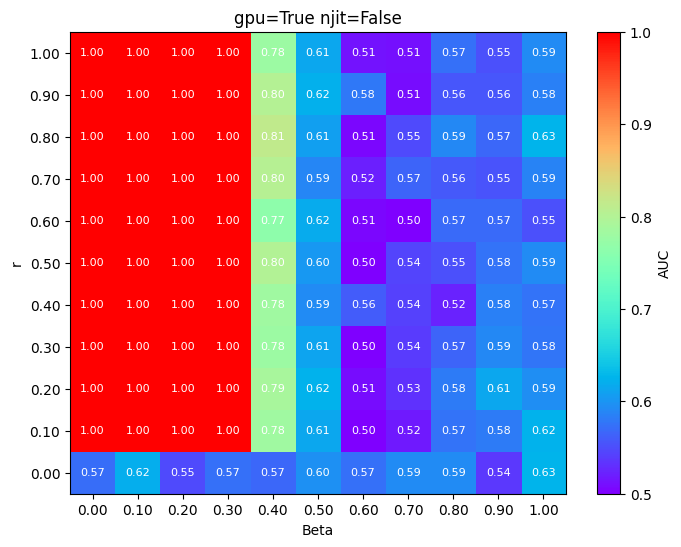

In [7]:
simulation3(N=N, num_monte=num_monte,\
            r_range=r_range, beta_range=beta_range,\
            alpha_selection_method = alpha,\
                transform_method='higher_criticism_unstable',\
            discovery_method='argmin')

Running on {'N': 1000, 'num_monte': 100, 'alpha_selection_method': 0.1, 'transform_method': 'berk_jones', 'discovery_method': 'argmin'}


Processing: 100%|██████████| 122/122 [02:16<00:00,  1.12s/step, Current Step=121]


gpu=False njit=False --> auc.mean()=0.73


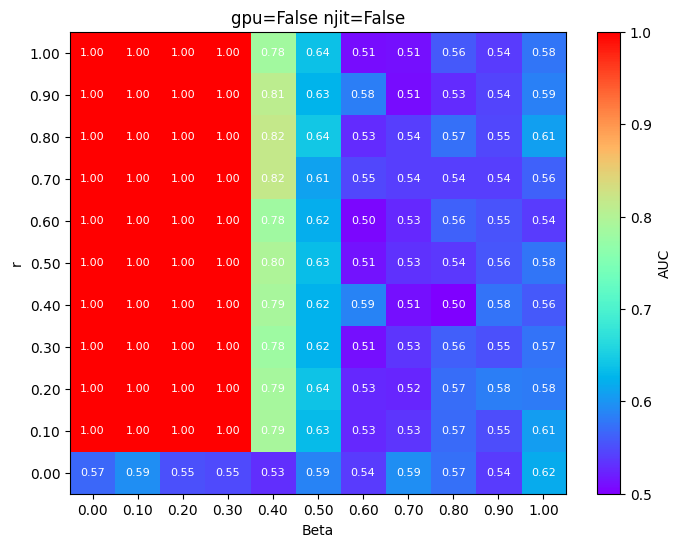

Processing: 100%|██████████| 122/122 [00:03<00:00, 32.43step/s, Current Step=121]


gpu=False njit=True --> auc.mean()=0.73


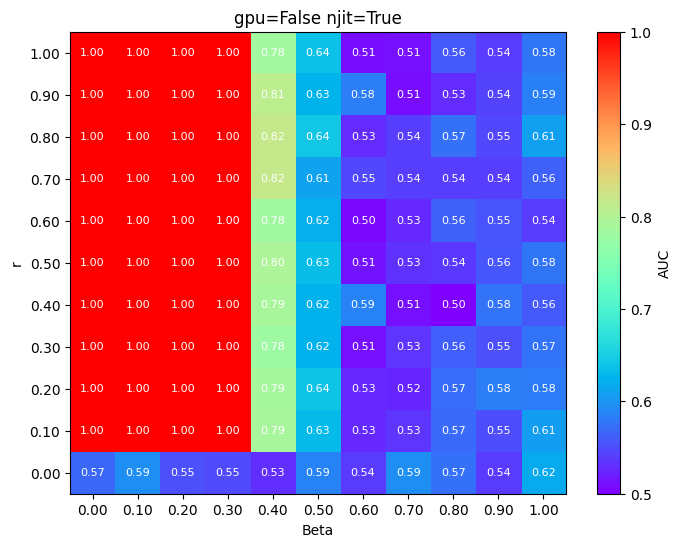

Processing: 100%|██████████| 122/122 [00:02<00:00, 58.83step/s, Current Step=121]


gpu=True njit=False --> auc.mean()=0.73


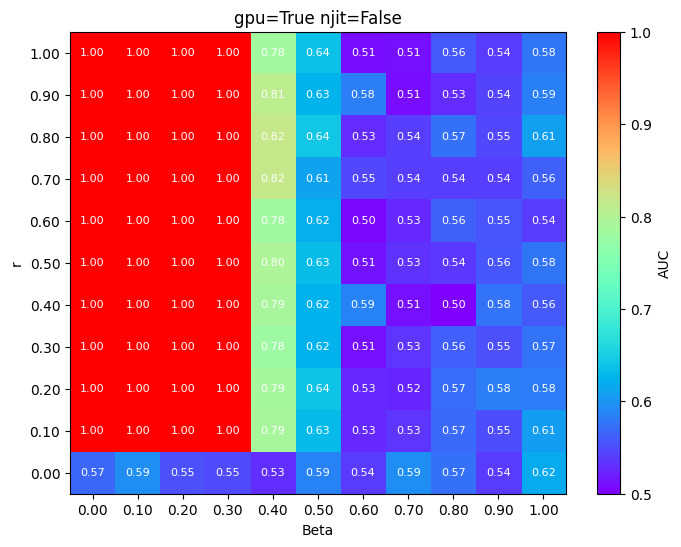

In [8]:
simulation3(N=N, num_monte=num_monte,\
            r_range=r_range, beta_range=beta_range,\
            alpha_selection_method = alpha,\
                transform_method='berk_jones',\
            discovery_method='argmin')